## Initialize session

In [7]:
%matplotlib notebook
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np
import matplotlib.pyplot as plt

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

## Virial Theorem Estimate of T$_\mathrm{c}$ and $P_\mathrm{c}$

The virial theorem states that:

2$\langle \Omega \rangle$ = -$\langle U \rangle$

Where $\Omega$ is the total kinetic energy of the system and U is the potential energy of the system. This requires the condition that the system is in equillibrium and for a star on the main sequence this is generally true.

### Gravitational Potential Energy
The total gravitational potential energy stored in a sphere/star is given by:

dU = -$\frac{GM_\mathrm{r}dm}{r}$

U = -$\int_{0}^{R}\frac{GM_\mathrm{r}dm}{r}$; dm = 4$\pi r^{2} \rho$, M$_\mathrm{r} = M (\frac{r}{R})^3$ and $\rho \approx \frac{M}{\frac{4}{3} \pi R^{3}}$

U = -$\frac{3}{5}\frac{GM^{2}}{R}$

### Kinetic Energy and Temperature
For a Maxwell-Boltzmann distribution of particle velocities (ideal gas with no significant interactions between particles) then the average kinetic energy per particle is related to the temperature of the system:

$\frac{1}{2}m\langle v^{2} \rangle = \frac{3}{2}kT$

The total kinetic energy of the system is just the average kinetic energy per particle times the number of particles. The number of particles can be approximated as being the mass of the star divided by the average mass per particle. With big bang composition, X $\approx$ 0.7 and Y $\approx$ 0.3 and both being completely ionized:

$\mu$ = $(2X + \frac{3}{4}Y)^{-1} \approx 0.615$

So,

$\Omega = \frac{3}{2}kT \frac{M}{\mu m_{u}}$

### Estimate for T$_\mathrm{c}$
Combining everything together:

T = $\frac{1}{5} \frac{GM}{R} \frac{\mu m_{u}}{k}$

This is the temperature of the virialized gas

In [38]:
# composition
X = 0.7
Y = 0.3
mu = (2 * X + 3/4. * Y)**-1

# constants in SI
G = 6.67e-11
k = 1.38e-23
mass_unit = 1.66054e-27

# For the sun
Msun = 1.989e30
Rsun = 6.95e8

Tc = (1/5.) * (G * Msun * mu * mass_unit) / (Rsun * k)

print 'the temperature at the center of the sun is approximately', Tc / 1e6 , 'million Kelvin'

the temperature at the center of the sun is approximately 2.82697975252 million Kelvin


### Estimate for $P_\mathrm{c}$
In the previous derivation the gas is approximated as ideal and so there is a relationship between the pressure and the internal energy of the system. 

P = $\frac{1}{3} \frac{\epsilon}{V}$

The internal energy of the ideal gas is just:

$\epsilon$ = $\frac{3}{2} \frac{M}{\mu m_\mathrm{u}}k T = \frac{1}{2} U$

So the pressure of the virialized gas is

P = $\frac{3}{40\pi} \frac{G M^{2}}{R^{4}}$

In [12]:
Pc = (3/(40. * np.pi)) * (G * Msun**2) / Rsun**4

print 'the pressure at the center of the sun is approximately', Pc / 1e12, 'trillion Pascals'

the pressure at the center of the sun is approximately 27.000236765 trillion Pascal


## Hydrostatic Equillibrium Estimate of T$_\mathrm{c}$ and $P_\mathrm{c}$

### Hydrostatic Equillibrium
For hydrostatic equillbrium for a system that has spherical symmetry:

$\frac{dP}{dr} = -\vec{g}\rho$

With assuming a constant density being equal to the average density of the sphere and then enclosed mass being equal to:

$M_\mathrm{r} = \int_{0}^{R}4\pi r'^{2}\rho(r')dr'$ and $\rho = \frac{M}{\frac{4}{3} \pi R^{3}}$

$M_\mathrm{r} = M (\frac{r}{R})^3$

Then integrating

$\int_{P_\mathrm{c}}^{P_\mathrm{surf}}dP = \int_{0}^{R} \frac{GM}{r^2} (\frac{r}{R})^3 \rho$

$\Delta P = - \frac{3 G M^2}{8 \pi R}$

For a star, the central pressure is much larger than the surface pressure such that $\Delta P \approx -P_\mathrm{c}$

$P_\mathrm{c} = \frac{3}{8 \pi} \frac{G M^2}{R^4}$

In [13]:
Pc2 = (3 * G * Msun**2 ) / (8 *np.pi * Rsun**4)

print 'the central pressure of the sun is', Pc2 / 1e12, 'trillion Pascals'

the central pressure of the sun is 135.001183825 trillion Pascals


### Estimate for $T_\mathrm{c}$

The equation of state for a star can be approximated as an ideal gas and so the pressure is related to the temperature. The number density of particles can be rewritten in terms of the density of the star divided into the mean molecular weight of each particle:

$P = \frac{\rho}{\mu m_\mathrm{u}} k T$

Using a big bang composition that is completely ionized, $\mu \approx 0.615$ so the central temperature is

$T_\mathrm{c} = \frac{G M}{2R} \frac{\mu m_\mathrm{u}}{k}$

In [14]:
Tc2 = (G * Msun * mu * mass_unit) / (2*Rsun*k)

print 'the central temperature of the sun is', Tc2 / 1e6, 'million Kelvin'

the central temperature of the sun is 7.06744938129 million Kelvin


## Mesa Models

These relationships between the mass, radius and composition of the stars with the central temperature and pressures can be checked with main sequence stars modelled through Mesa. There is most likely some major deviations for stars that are not on the main sequence which have equations of state that will be quite different from just the ideal gas.

In [30]:
# Find the data from the MESA models at the main sequence model numbers
massZAMS = [1,2,4,6,12,25]
Z = 0.02

# list to hold star objects
stars = []

for i in range(len(massZAMS)):
    stars.append(ms.star_log(mass=massZAMS[i],Z=Z))

Closing star.log  tool ...
Closing star.log  tool ...
Closing star.log  tool ...
Closing star.log  tool ...
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 1.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 1.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 4.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 4.0
Searching files, please wait.......
Reading preprocessor fi

In [34]:
# Determine the start of the main sequence by longest time step and collect quantities
mesaTc = []
mesaPc = []
mesaR = []
mesaM = []
mesaMu = []

for i in range(len(massZAMS)):
    
    # get the time steps
    time = stars[i].get('log_dt')
    
    # get the longest time step model number
    modelNum = np.argmax(time)
    
    # collect quantities and convert
    mesaTc.append((stars[i].get('log_center_T')[modelNum]))
    mesaPc.append(stars[i].get('log_center_P')[modelNum])
    mesaR.append(stars[i].get('log_R')[modelNum])
    mesaM.append(stars[i].get('star_mass')[modelNum])
    
    # need to make an estimate of mu at the center (not in all stars in mesa get functions!)
    # assume full ionization
    X = stars[i].get('center_h1')[modelNum]
    Y = stars[i].get('center_he4')[modelNum]
    
    mesaMu.append((2 * X + (3/4.)*Y + 2 * Z)**-1)

## Discussion Between Results and Comparison With MESA Models

The goal is to compare the estimates from the virial and hydrostatic conditions (basically the same) with that from the mesa models which take into account many more effects that are occuring in the center of the stars. The mass and radii are calculated from mesa models while $\mu$ is estimated from the mass fractions of hydrogen, helium and the models starting metallicity assuming full ionization.

<IPython.core.display.Javascript object>


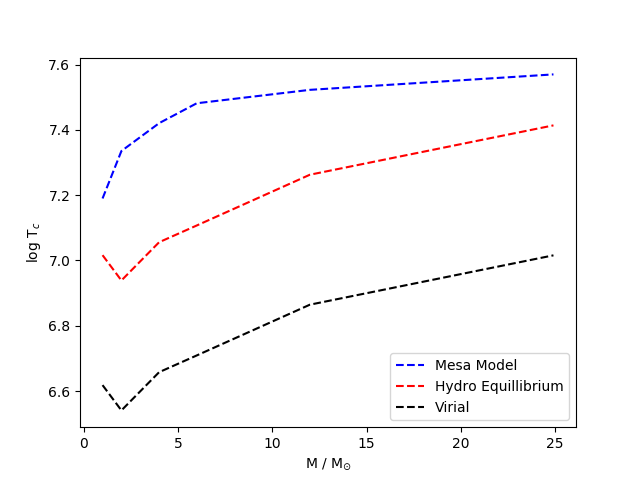

In [50]:
# create a plot of Tc from Mesa and Tc from virial and hydrostatic equillibrium
def Tc_hydro(M,R,mu):
    # ensure inputted values are SI!
    return np.log10((G * M * mu * mass_unit) / (2 * R * k))

def Tc_virial(M,R,mu):
    # ensure inputted values are SI!
    return np.log10((G * M * mu * mass_unit) / (5 * R * k))

# create conversions to SI 
Tc_vir = []
Tc_hyd = []

for i in range(len(mesaM)):
    mesaM_convert = mesaM[i] * Msun
    mesaR_convert = 10**(mesaR[i]) * Rsun
    
    # grab the Tc values
    Tc_vir.append(Tc_virial(mesaM_convert,mesaR_convert,mesaMu[i]))
    Tc_hyd.append(Tc_hydro(mesaM_convert,mesaR_convert,mesaMu[i]))
    
# create figure
plt.figure(1)

# plot each
plt.plot(mesaM,mesaTc,'b--',label='Mesa Model')
plt.plot(mesaM,Tc_hyd,'r--',label='Hydro Equillibrium')
plt.plot(mesaM,Tc_vir,'k--',label='Virial')

# labels
plt.xlabel(r"M / M$_{\odot}$")
plt.ylabel(r"log T$_{c}$")

# legend
plt.legend()

<IPython.core.display.Javascript object>


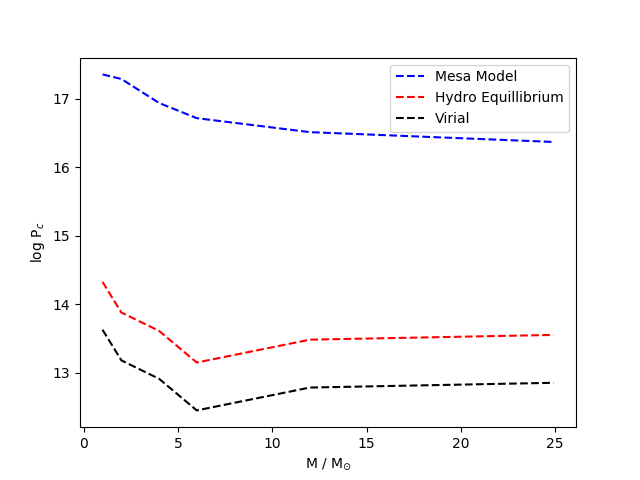

In [54]:
# create a plot of Pc from Mesa and Pc from virial and hydrostatic equillibrium
def Pc_hydro(M,R,mu):
    # ensure inputted values are SI!
    return np.log10((3* G * M**2 ) / (8 * np.pi * R**4))

def Pc_virial(M,R,mu):
    # ensure inputted values are SI!
    return np.log10((3 * G * M**2) / (40 * np.pi * R**4))

# create conversions to SI 
Pc_vir = []
Pc_hyd = []

for i in range(len(mesaM)):
    mesaM_convert = mesaM[i] * Msun
    mesaR_convert = 10**(mesaR[i]) * Rsun
    
    # grab the Tc values
    Pc_vir.append(Pc_virial(mesaM_convert,mesaR_convert,mesaMu[i]))
    Pc_hyd.append(Pc_hydro(mesaM_convert,mesaR_convert,mesaMu[i]))
    
# create figure
plt.figure(2)

# plot each
plt.plot(mesaM,mesaPc,'b--',label='Mesa Model')
plt.plot(mesaM,Pc_hyd,'r--',label='Hydro Equillibrium')
plt.plot(mesaM,Pc_vir,'k--',label='Virial')

# labels
plt.xlabel(r"M / M$_{\odot}$")
plt.ylabel(r"log P$_{c}$")

# legend
plt.legend()

The central temperature estimates for the virial and hydrostatic equillibrium are pretty close to what the mesa models predict and has close to the same trends for various mass ranges of stars. However, the central pressure estimates are severly underestimated, by about 3 orders of magnitude.